In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
!pip install psycopg2-binary


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 660.6 kB/s eta 0:00:02
   -------- ------------------------------- 0.2/1.2 MB 2.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.2 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.2 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 5.3 MB/s eta 0:00:00


In [13]:
import psycopg2

# PostgreSQL se connection
conn = psycopg2.connect(
    host="localhost",
    database="sales_project_db",
    user="postgres",
    password="167542",
    port=5432
)

# Query aur DataFrame me convert
query = 'SELECT * FROM "retail sales".store_data;'
df = pd.read_sql_query(query, conn)

# Connection close kar do
conn.close()

# Data check karo
df.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9004\2606481442.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,date,product,category,region,quantity,unit_price,total_amount
0,2023-01-01,Shampoo,Personal Care,North,10,50.0,500.0
1,2023-01-02,Toothpaste,Personal Care,South,15,30.0,450.0
2,2023-01-03,Soap,Personal Care,East,20,20.0,400.0
3,2023-01-04,Face Wash,Personal Care,West,5,70.0,350.0
4,2023-01-05,Lotion,Personal Care,North,12,90.0,1080.0


In [15]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          10 non-null     object 
 1   product       10 non-null     object 
 2   category      10 non-null     object 
 3   region        10 non-null     object 
 4   quantity      10 non-null     int64  
 5   unit_price    10 non-null     float64
 6   total_amount  10 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes


date            0
product         0
category        0
region          0
quantity        0
unit_price      0
total_amount    0
dtype: int64

# top 5 products by sales

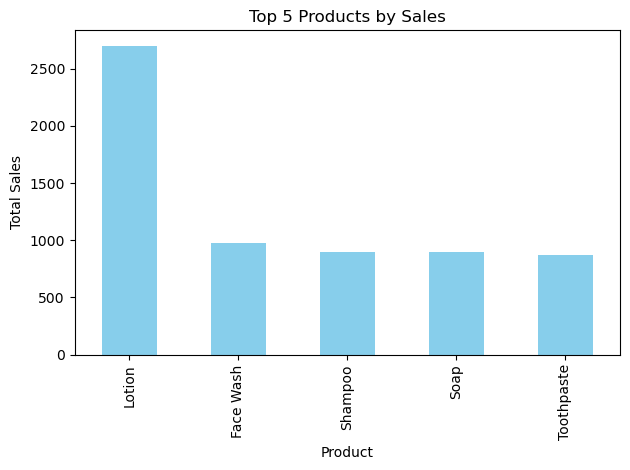

In [17]:
top_products = df.groupby('product')['total_amount'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', title='Top 5 Products by Sales', xlabel='Product', ylabel='Total Sales', color='skyblue')
plt.tight_layout()
plt.show()


# Region-wise sales analysis

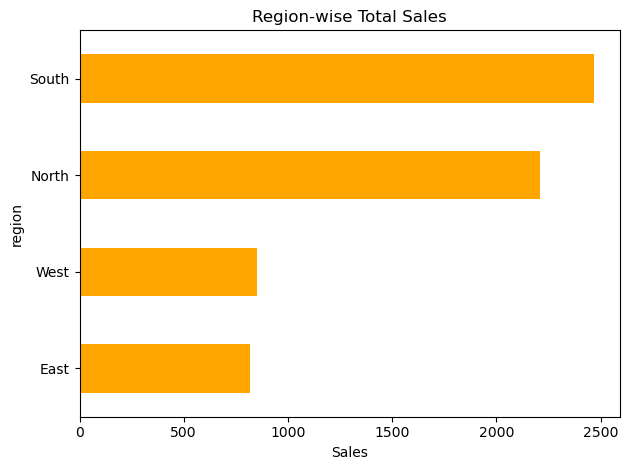

In [25]:
region_sales = df.groupby('region')['total_amount'].sum().sort_values()
region_sales.plot(kind='barh', title='Region-wise Total Sales', xlabel='Sales', color='orange')
plt.tight_layout()
plt.show()


# monthly sales trend


C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


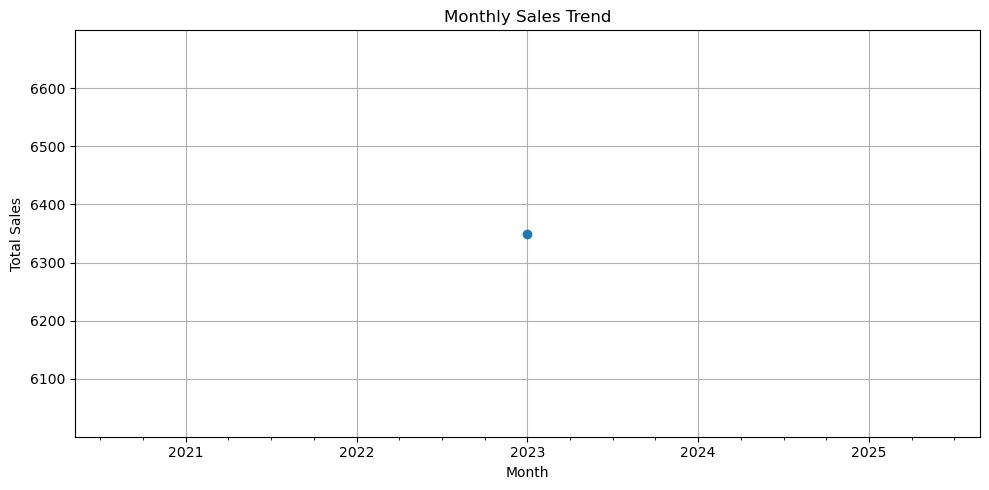

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

monthly_sales = df.groupby('month')['total_amount'].sum()

monthly_sales.plot(marker='o', figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Category-wise sales

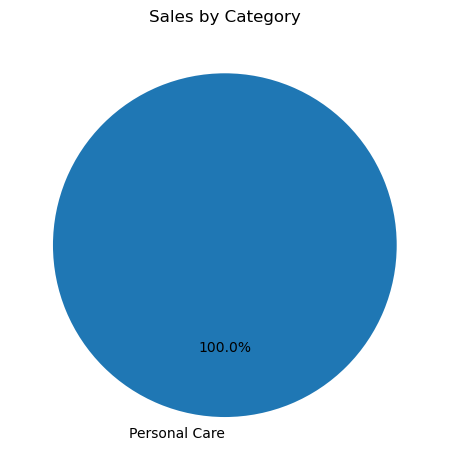

In [33]:
category_sales = df.groupby('category')['total_amount'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Sales by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()


# Top 5 regions by total quantity sold


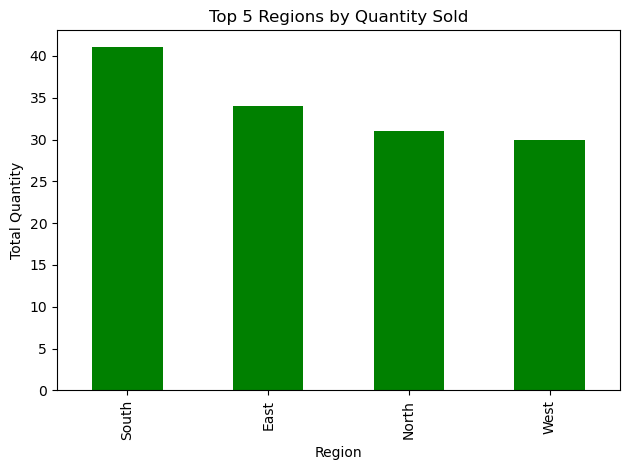

In [37]:
top_regions_qty = df.groupby('region')['quantity'].sum().sort_values(ascending=False).head(5)
top_regions_qty.plot(kind='bar', color='green', title='Top 5 Regions by Quantity Sold')
plt.xlabel('Region')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()


#  Average unit price per category


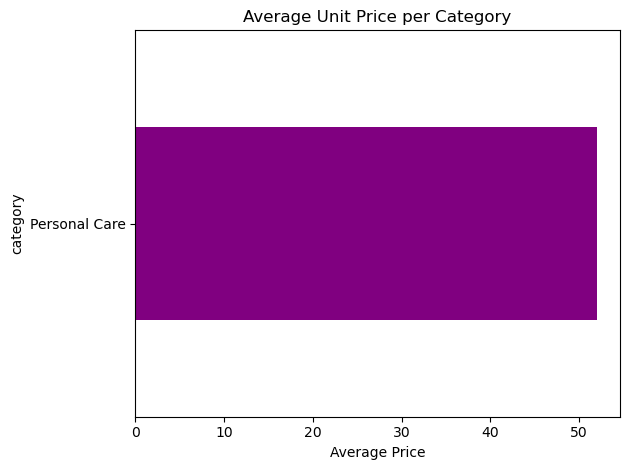

In [41]:
avg_price_category = df.groupby('category')['unit_price'].mean().sort_values()
avg_price_category.plot(kind='barh', color='purple', title='Average Unit Price per Category')
plt.xlabel('Average Price')
plt.tight_layout()
plt.show()


#  Correlation Heatmap

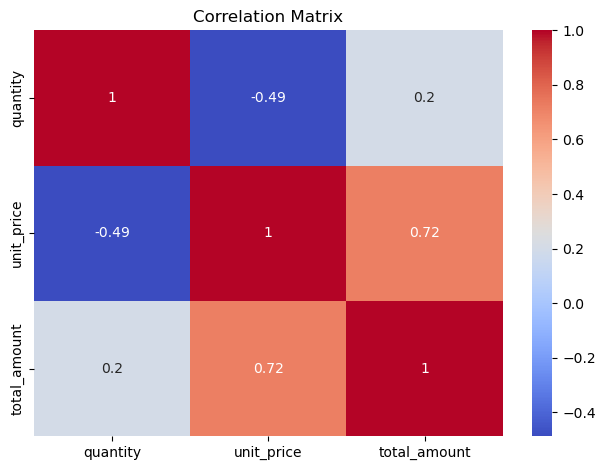

In [45]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


# Best-Selling Product in Each Region


In [49]:
best_product_region = df.groupby(['region', 'product'])['total_amount'].sum().reset_index()
best_per_region = best_product_region.sort_values('total_amount', ascending=False).drop_duplicates('region')

print(best_per_region)


  region     product  total_amount
5  South      Lotion        1620.0
3  North      Lotion        1080.0
9   West        Soap         500.0
1   East  Toothpaste         420.0


# Time Series Forecasting

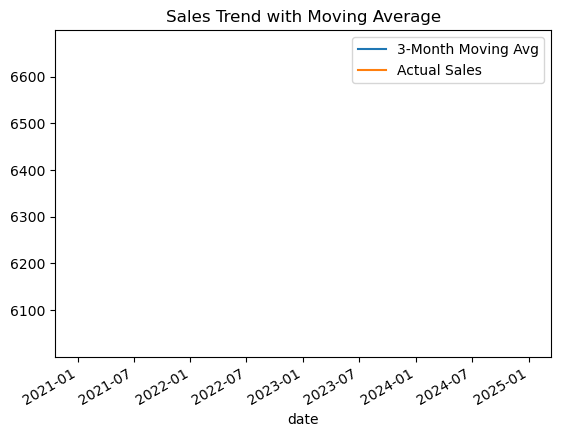

In [53]:
monthly = df.groupby(df['date'].dt.to_period('M'))['total_amount'].sum()
monthly.index = monthly.index.to_timestamp()

# Simple moving average
monthly.rolling(window=3).mean().plot(label='3-Month Moving Avg', legend=True)
monthly.plot(label='Actual Sales', legend=True)
plt.title("Sales Trend with Moving Average")
plt.show()
